# PCA
# 고차원 데이터를 저차원 벡터공간에 투영시켜 차원축소 후, 주성분을 찾겠다
- 주성분 : 좌표변환된 투영벡터 각 원소
- 주성분 = 잠재변수, 기저에서 각 데이터 결정짓는 요소 
- 주성분 = 저차원 벡터공간 각 기저벡터와 고차원 데이터 내적


In [70]:
from sklearn.datasets import load_iris
X = load_iris().data
IRIS = X[:10,0:2]

from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(IRIS) #차원축소해라

In [27]:
#벡터 투영하게 해준 저차원 공간의 기저벡터
pca1.components_

array([[0.68305029, 0.73037134]])

In [28]:
#데이터 원점 
pca1.mean_

array([4.86, 3.31])

In [35]:
#기저벡터는 IRIS의 오른쪽 특이벡터 중 가장 큰 K개 특잇값에 대응하는 특이벡터와 같다. 
U, sg, VT = np.linalg.svd(IRIS-pca1.mean_)

print(sg)
print(VT)
print()
print(VT[0])

[1.20080094 0.41361469]
[[-0.68305029 -0.73037134]
 [-0.73037134  0.68305029]]

[-0.68305029 -0.73037134]


In [43]:
A = IRIS-pca1.mean_
X2 = A.T@A

ld, V = np.linalg.eig(X2)

print(ld)
print(V)
print()
print(V[:,np.argmax(ld)])

[0.17107711 1.44192289]
[[-0.73037134 -0.68305029]
 [ 0.68305029 -0.73037134]]

[-0.68305029 -0.73037134]


In [46]:
IRIS[7,:]

array([5. , 3.4])

In [51]:
(IRIS[7]-pca1.mean_)@pca1.components_.reshape(2,1)

array([0.16136046])

In [52]:
X_low[7]

array([0.16136046])

In [55]:
# 다시 2차원 축을 기준으로 역변환(좌표변환) 하기 
pca1.inverse_transform(X_low)[7]

array([4.97021731, 3.42785306])

In [57]:
# 원래 데이터 
IRIS[7]

array([5. , 3.4])

In [75]:
SE = X[:50, 2:4]

In [81]:
# 연습문제 3.5.1 
pca2 = PCA(n_components=1)
X_low = pca2.fit_transform(SE) #1차원으로 차원축소 
pca2.components_

array([[0.96004653, 0.27984043]])

In [82]:
X_low[8]

array([-0.07239554])

In [88]:
(SE[8]-pca2.mean_)@pca2.components_.T

array([-0.07239554])

In [101]:
#2. 
SSE = X[:50]
pca3 = PCA(n_components=1)
X_low = pca3.fit_transform(SSE)
X_low[9]

array([-0.31733442])

In [102]:
pca3.components_

array([[0.6690784 , 0.73414783, 0.0965439 , 0.06356359]])

In [108]:
pca3.components_@(SSE[9]-pca3.mean_.T)

array([-0.31733442])

# 사람얼굴 PCA

In [300]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
faces_all = fetch_olivetti_faces()

pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == 20]
w3 = pca3.fit_transform(X3)

In [301]:
pca3.inverse_transform(w3)[0]
#이걸 기저에서 결정짓는 데이터(주성분)는 벡터공간의 기저벡터다

array([0.45896935, 0.5135883 , 0.5374876 , ..., 0.33472365, 0.41416878,
       0.5233549 ], dtype=float32)

In [317]:
pca3.mean_

array([0.37355372, 0.4053719 , 0.43760332, ..., 0.42809922, 0.4264462 ,
       0.4157025 ], dtype=float32)

In [309]:
face_p1 = pca3.components_[0].reshape(64,64 )
face_p2 = pca3.components_[1].reshape(64,64)

In [310]:
w3

array([[-2.213675 ,  4.2135143],
       [ 2.2680862,  3.737621 ],
       [ 0.6599925,  3.1209528],
       [-1.7500461, -1.4096627],
       [-3.3963792, -1.5552868],
       [-3.335582 , -1.7309357],
       [ 3.3851447, -2.1805716],
       [ 3.9338183, -1.5998877],
       [-3.209436 , -1.2286732],
       [ 3.658079 , -1.3670688]], dtype=float32)

# 테스트 : 저차원 근사 데이터 각 성분은 주성분 비중이라니? 무슨 말이지? 확인해보자.

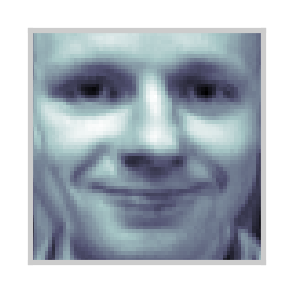

In [319]:
plt.figure(figsize=(1,10))
plt.imshow(pca3.mean_.reshape(64,64)+face_p1*(-2.213675) + face_p2*(4.2135143), plt.cm.bone)
plt.xticks([])
plt.yticks([])
plt.show()

In [344]:
pca3.inverse_transform(w3)[0].reshape(64,64)[63]

array([0.36928248, 0.46620014, 0.5225044 , 0.4903757 , 0.35278186,
       0.27335352, 0.29294723, 0.40301394, 0.4550594 , 0.5073254 ,
       0.52198577, 0.44629982, 0.3822721 , 0.34062415, 0.308104  ,
       0.2971231 , 0.31026804, 0.31204355, 0.32059106, 0.33672556,
       0.3406535 , 0.3647886 , 0.37584424, 0.38185522, 0.38761222,
       0.3832805 , 0.3976754 , 0.39643466, 0.39242026, 0.38162193,
       0.38577232, 0.39105892, 0.39161518, 0.3884057 , 0.38574386,
       0.38603333, 0.38823628, 0.39195096, 0.3862619 , 0.3881001 ,
       0.38732314, 0.38210696, 0.37127852, 0.36704388, 0.36945528,
       0.3735578 , 0.38993055, 0.39970085, 0.40515646, 0.3911924 ,
       0.36435726, 0.35671735, 0.3417182 , 0.20368637, 0.1646811 ,
       0.20562993, 0.26395434, 0.29458833, 0.4110386 , 0.4423837 ,
       0.41069624, 0.33472365, 0.41416878, 0.5233549 ], dtype=float32)

In [345]:
(pca3.mean_.reshape(64,64)+face_p1*(-2.213675) + face_p2*(4.2135143))[63]

array([0.3692825 , 0.46620014, 0.5225044 , 0.4903757 , 0.35278183,
       0.27335352, 0.29294723, 0.40301394, 0.45505944, 0.5073254 ,
       0.52198577, 0.4462998 , 0.3822721 , 0.34062418, 0.308104  ,
       0.2971231 , 0.31026804, 0.31204355, 0.32059106, 0.33672556,
       0.3406535 , 0.3647886 , 0.37584424, 0.3818552 , 0.38761222,
       0.3832805 , 0.39767542, 0.39643466, 0.39242026, 0.38162196,
       0.38577235, 0.39105892, 0.39161518, 0.3884057 , 0.38574386,
       0.3860333 , 0.38823628, 0.39195096, 0.3862619 , 0.3881001 ,
       0.38732314, 0.38210696, 0.3712785 , 0.36704388, 0.36945525,
       0.37355784, 0.38993055, 0.39970085, 0.40515646, 0.3911924 ,
       0.36435726, 0.35671732, 0.3417182 , 0.20368636, 0.1646811 ,
       0.20562993, 0.26395434, 0.29458833, 0.41103864, 0.4423837 ,
       0.41069627, 0.33472365, 0.41416878, 0.5233549 ], dtype=float32)

## 같다

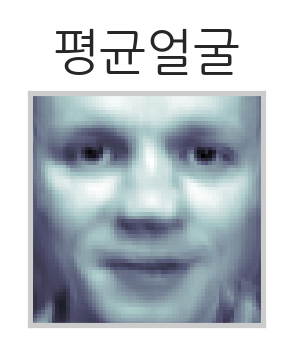

In [150]:
# 아이겐페이스 찾기 
face_mean = pca3.mean_.reshape(64, 64)
plt.figure(figsize=(1,10))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(face_mean, plt.cm.bone)
plt.title('평균얼굴')
plt.show()

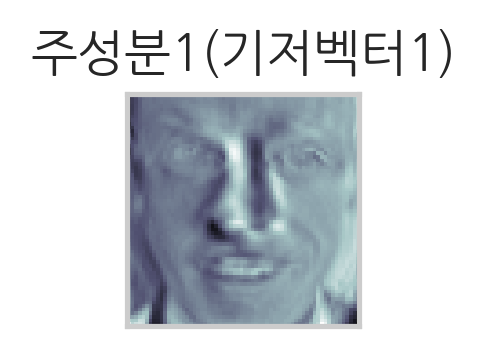

In [157]:
plt.figure(figsize=(1,10))
plt.imshow(face_p1, plt.cm.bone)
plt.yticks([])
plt.xticks([])
plt.grid(False)
plt.title('주성분1(기저벡터1)')
plt.show()

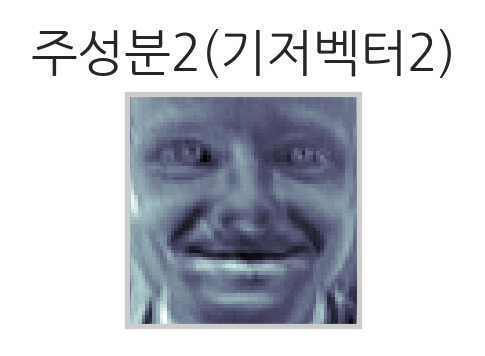

In [163]:
plt.figure(figsize=(1, 10))
plt.imshow(face_p2, plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('주성분2(기저벡터2)')
plt.show()

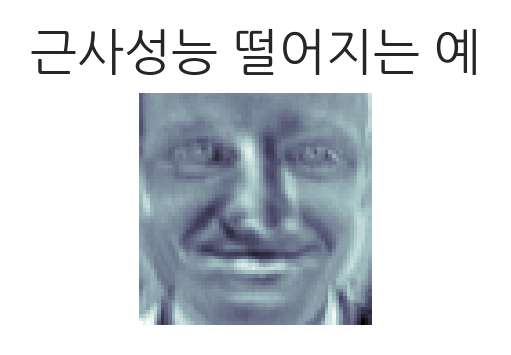

In [173]:
plt.figure(figsize=(1, 10))
plt.imshow(3.5*face_p1+5*face_p2, plt.cm.bone)
plt.grid(False)
plt.axis('off')
plt.title('근사성능 떨어지는 예')
plt.show()

# 평균 대신 원점 (0,0)에서 시작하면 근사 성능이 떨어진다. 위에처럼. 

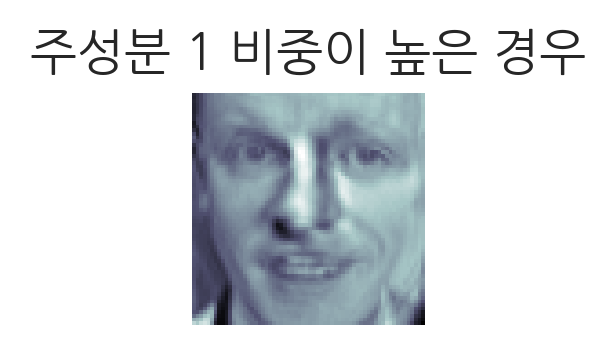

주성분 1은 얼굴 바라보는 방향을 결정짓는다


In [192]:
plt.figure(figsize=(1, 10))
plt.imshow(face_mean+10*face_p1, plt.cm.bone)
plt.grid(False)
plt.axis('off')
plt.title('주성분 1 비중이 높은 경우')
plt.show()
print('주성분 1은 얼굴 바라보는 방향을 결정짓는다')

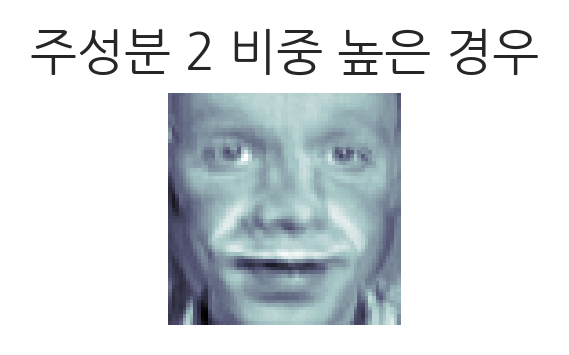

주성분 2는 미소 여부를 결정짓는다.


In [194]:
plt.figure(figsize=(1, 10))
plt.imshow(face_mean+-10*face_p2, plt.cm.bone)
plt.grid(False)
plt.axis('off')
plt.title('주성분 2 비중 높은 경우')
plt.show()
print('주성분 2는 미소 여부를 결정짓는다.')

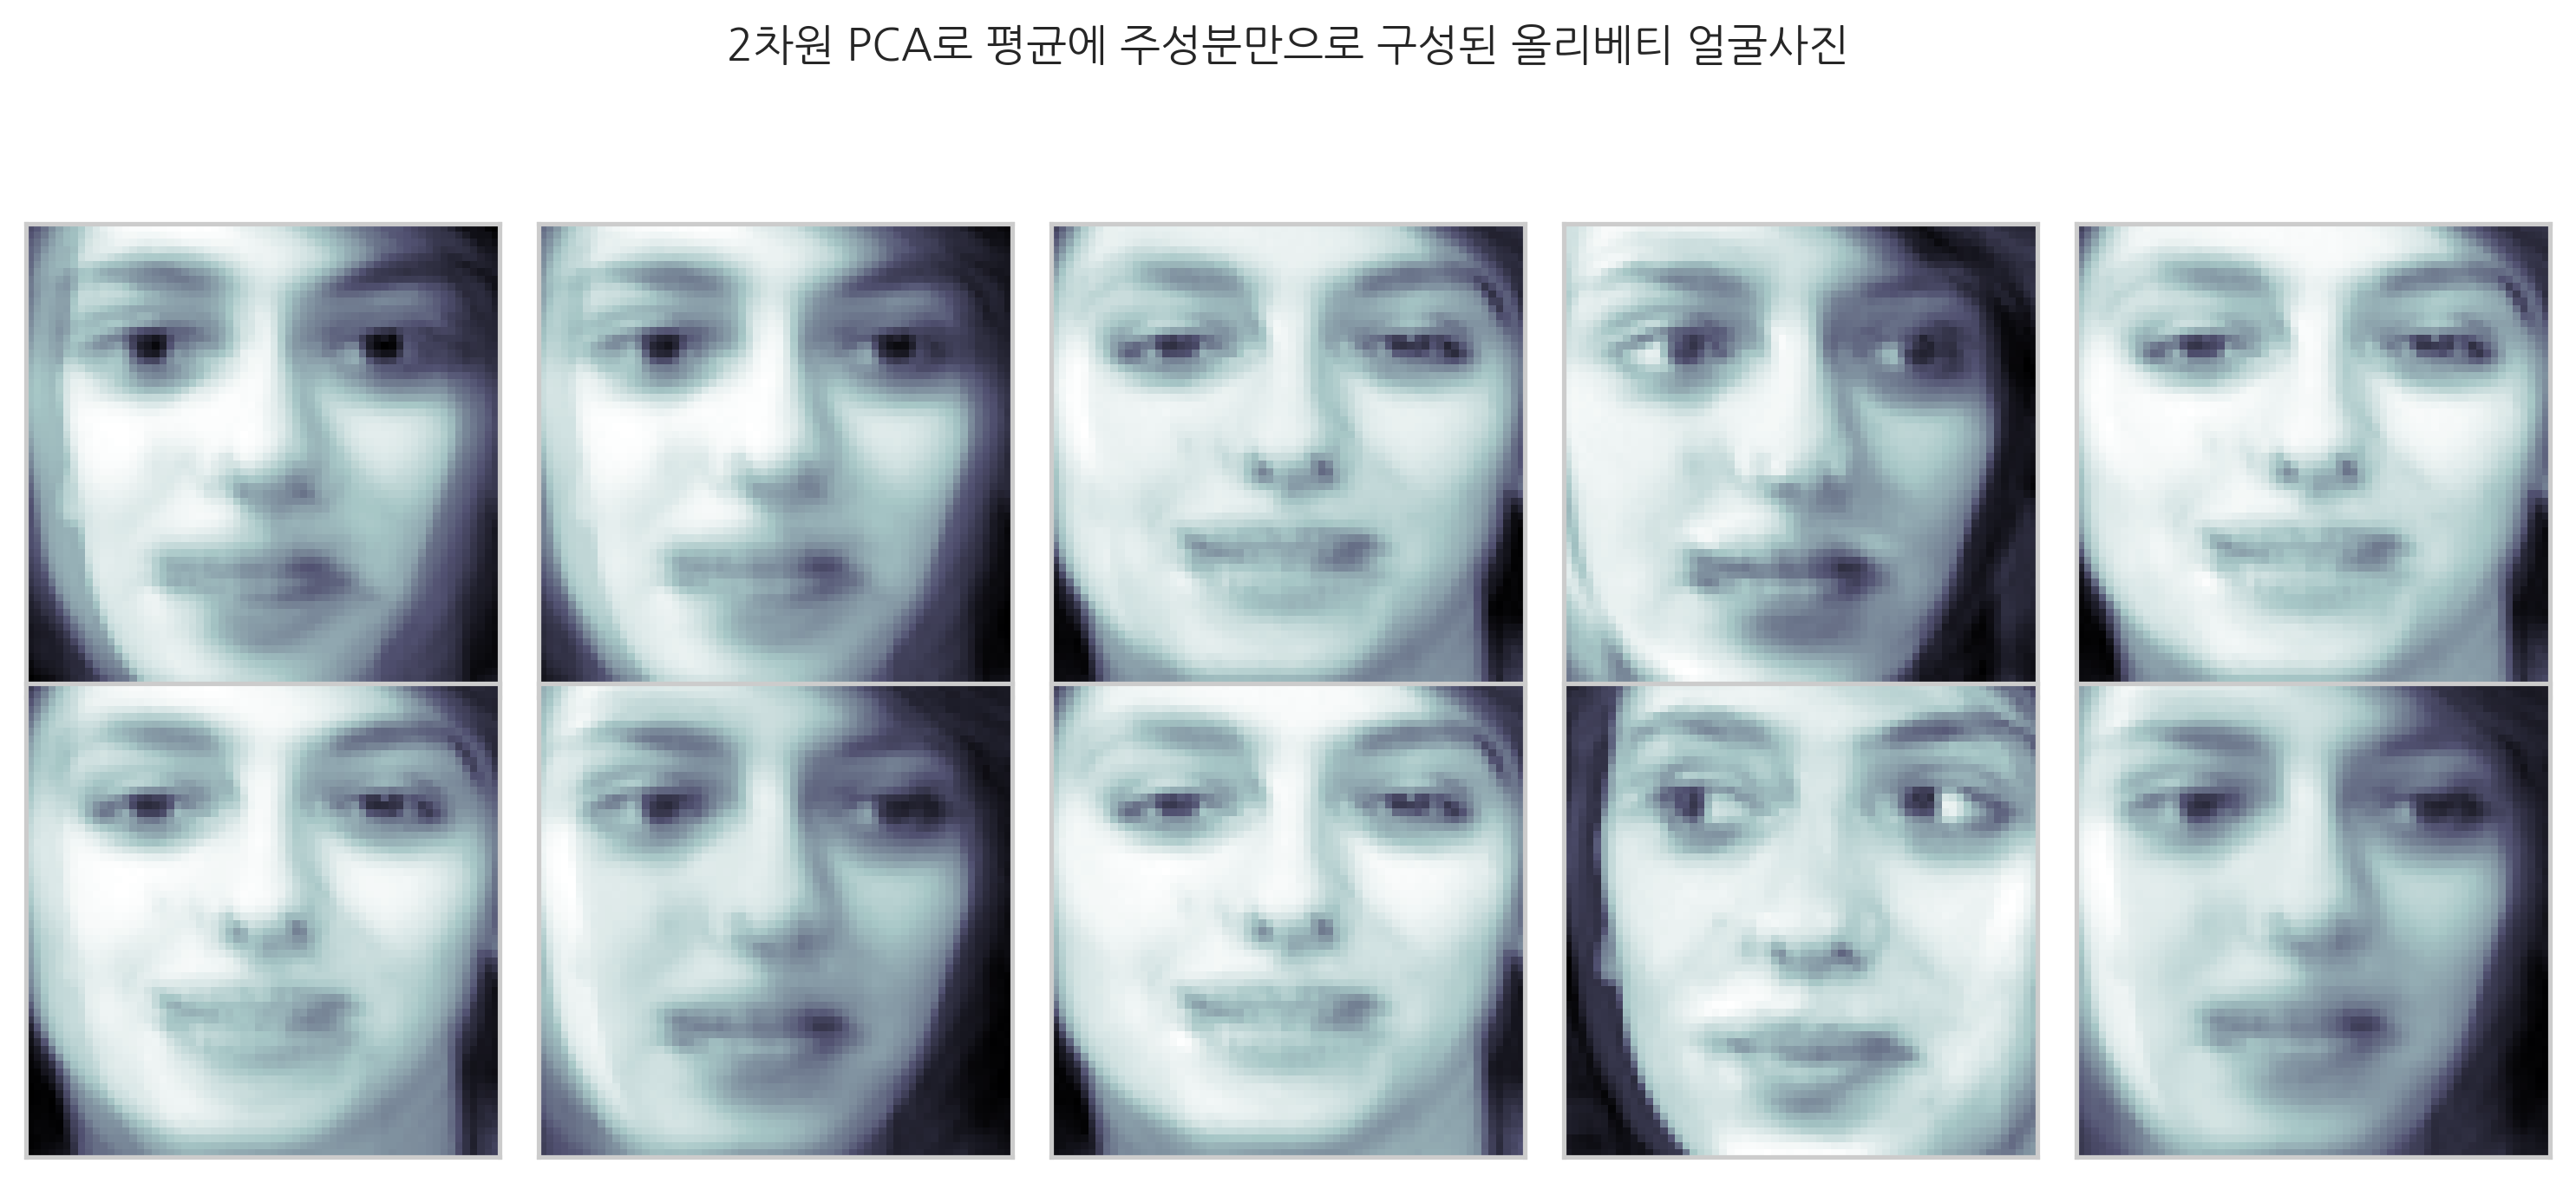

In [245]:
#3.5.2 연습문제
from sklearn.datasets import fetch_olivetti_faces
faces_all = fetch_olivetti_faces()

X = faces_all.data[faces_all.target == 7]
from sklearn.decomposition import PCA
pca4 = PCA(n_components=2)
X_low = pca4.fit_transform(X)
X33 = pca4.inverse_transform(X_low)

N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N) : 
    for j in range(M) : 
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X33[k].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle('2차원 PCA로 평균에 주성분만으로 구성된 올리베티 얼굴사진')
plt.tight_layout()
plt.show()

In [242]:
face_mean = pca4.mean_.reshape(64,64)
face_p1 = pca4.components_[0].reshape(64,64)
face_p2 = pca4.components_[1].reshape(64,64)

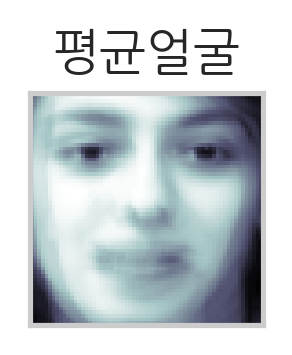

In [249]:
plt.figure(figsize=(1,10))
plt.imshow(face_mean, plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('평균얼굴')
plt.show()

# 아이겐페이스는?

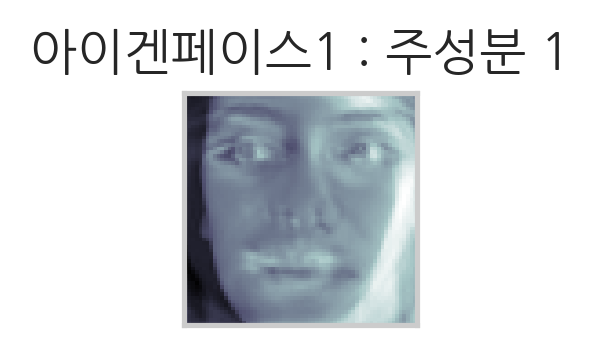

In [283]:
plt.figure(figsize=(1,10))
plt.imshow(face_p1, plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('아이겐페이스1 : 주성분 1')
plt.show()

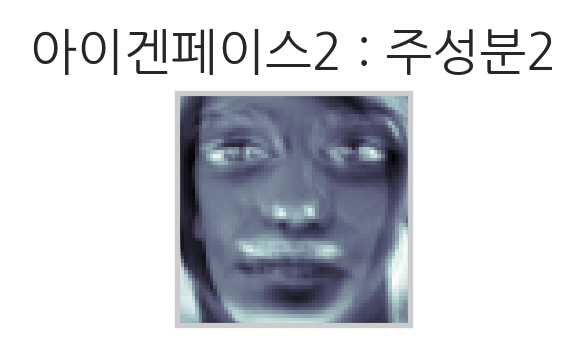

In [285]:
plt.figure(figsize=(1,10))
plt.imshow(face_p2, plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('아이겐페이스2 : 주성분2')
plt.show()

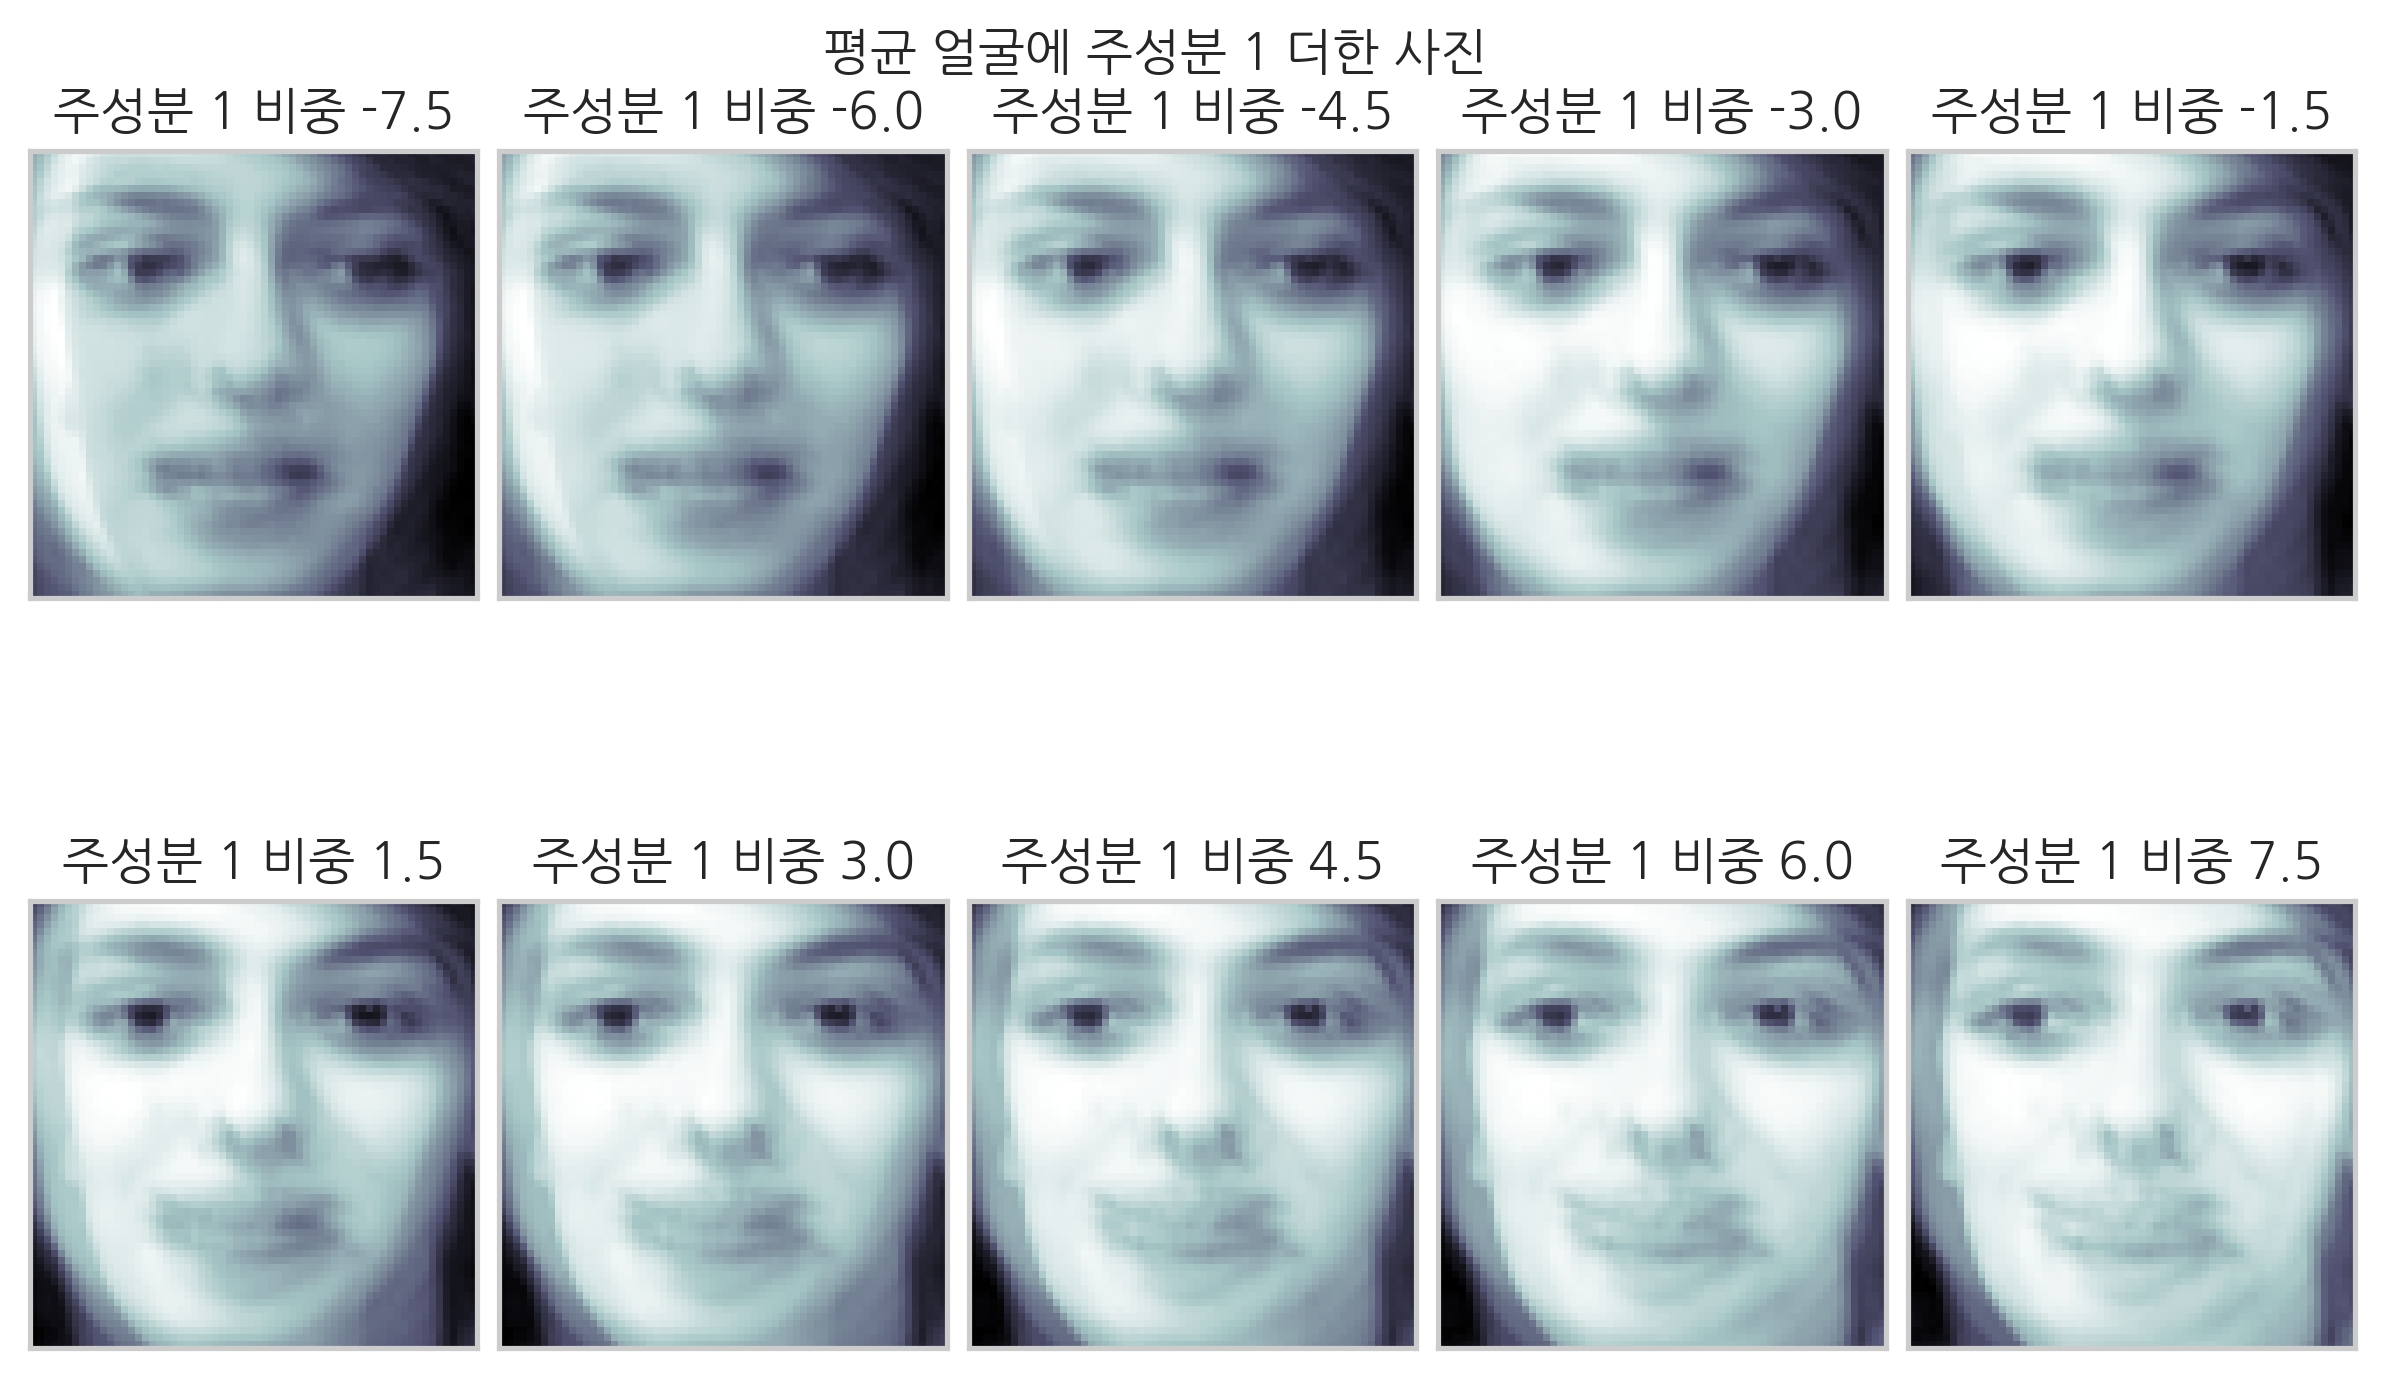

주성분 1은 사진의 좌우 시선을 결정짓는 주성분이다


In [265]:
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N) : 
    for j in range(M) :
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5*(k-5) if k < 5 else 1.5*(k-4)
        ax.imshow(face_mean+w*face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('주성분 1 비중 %s' %w)
plt.suptitle('평균 얼굴에 주성분 1 더한 사진')
plt.show()
print('주성분 1은 사진의 좌우 시선을 결정짓는 주성분이다')

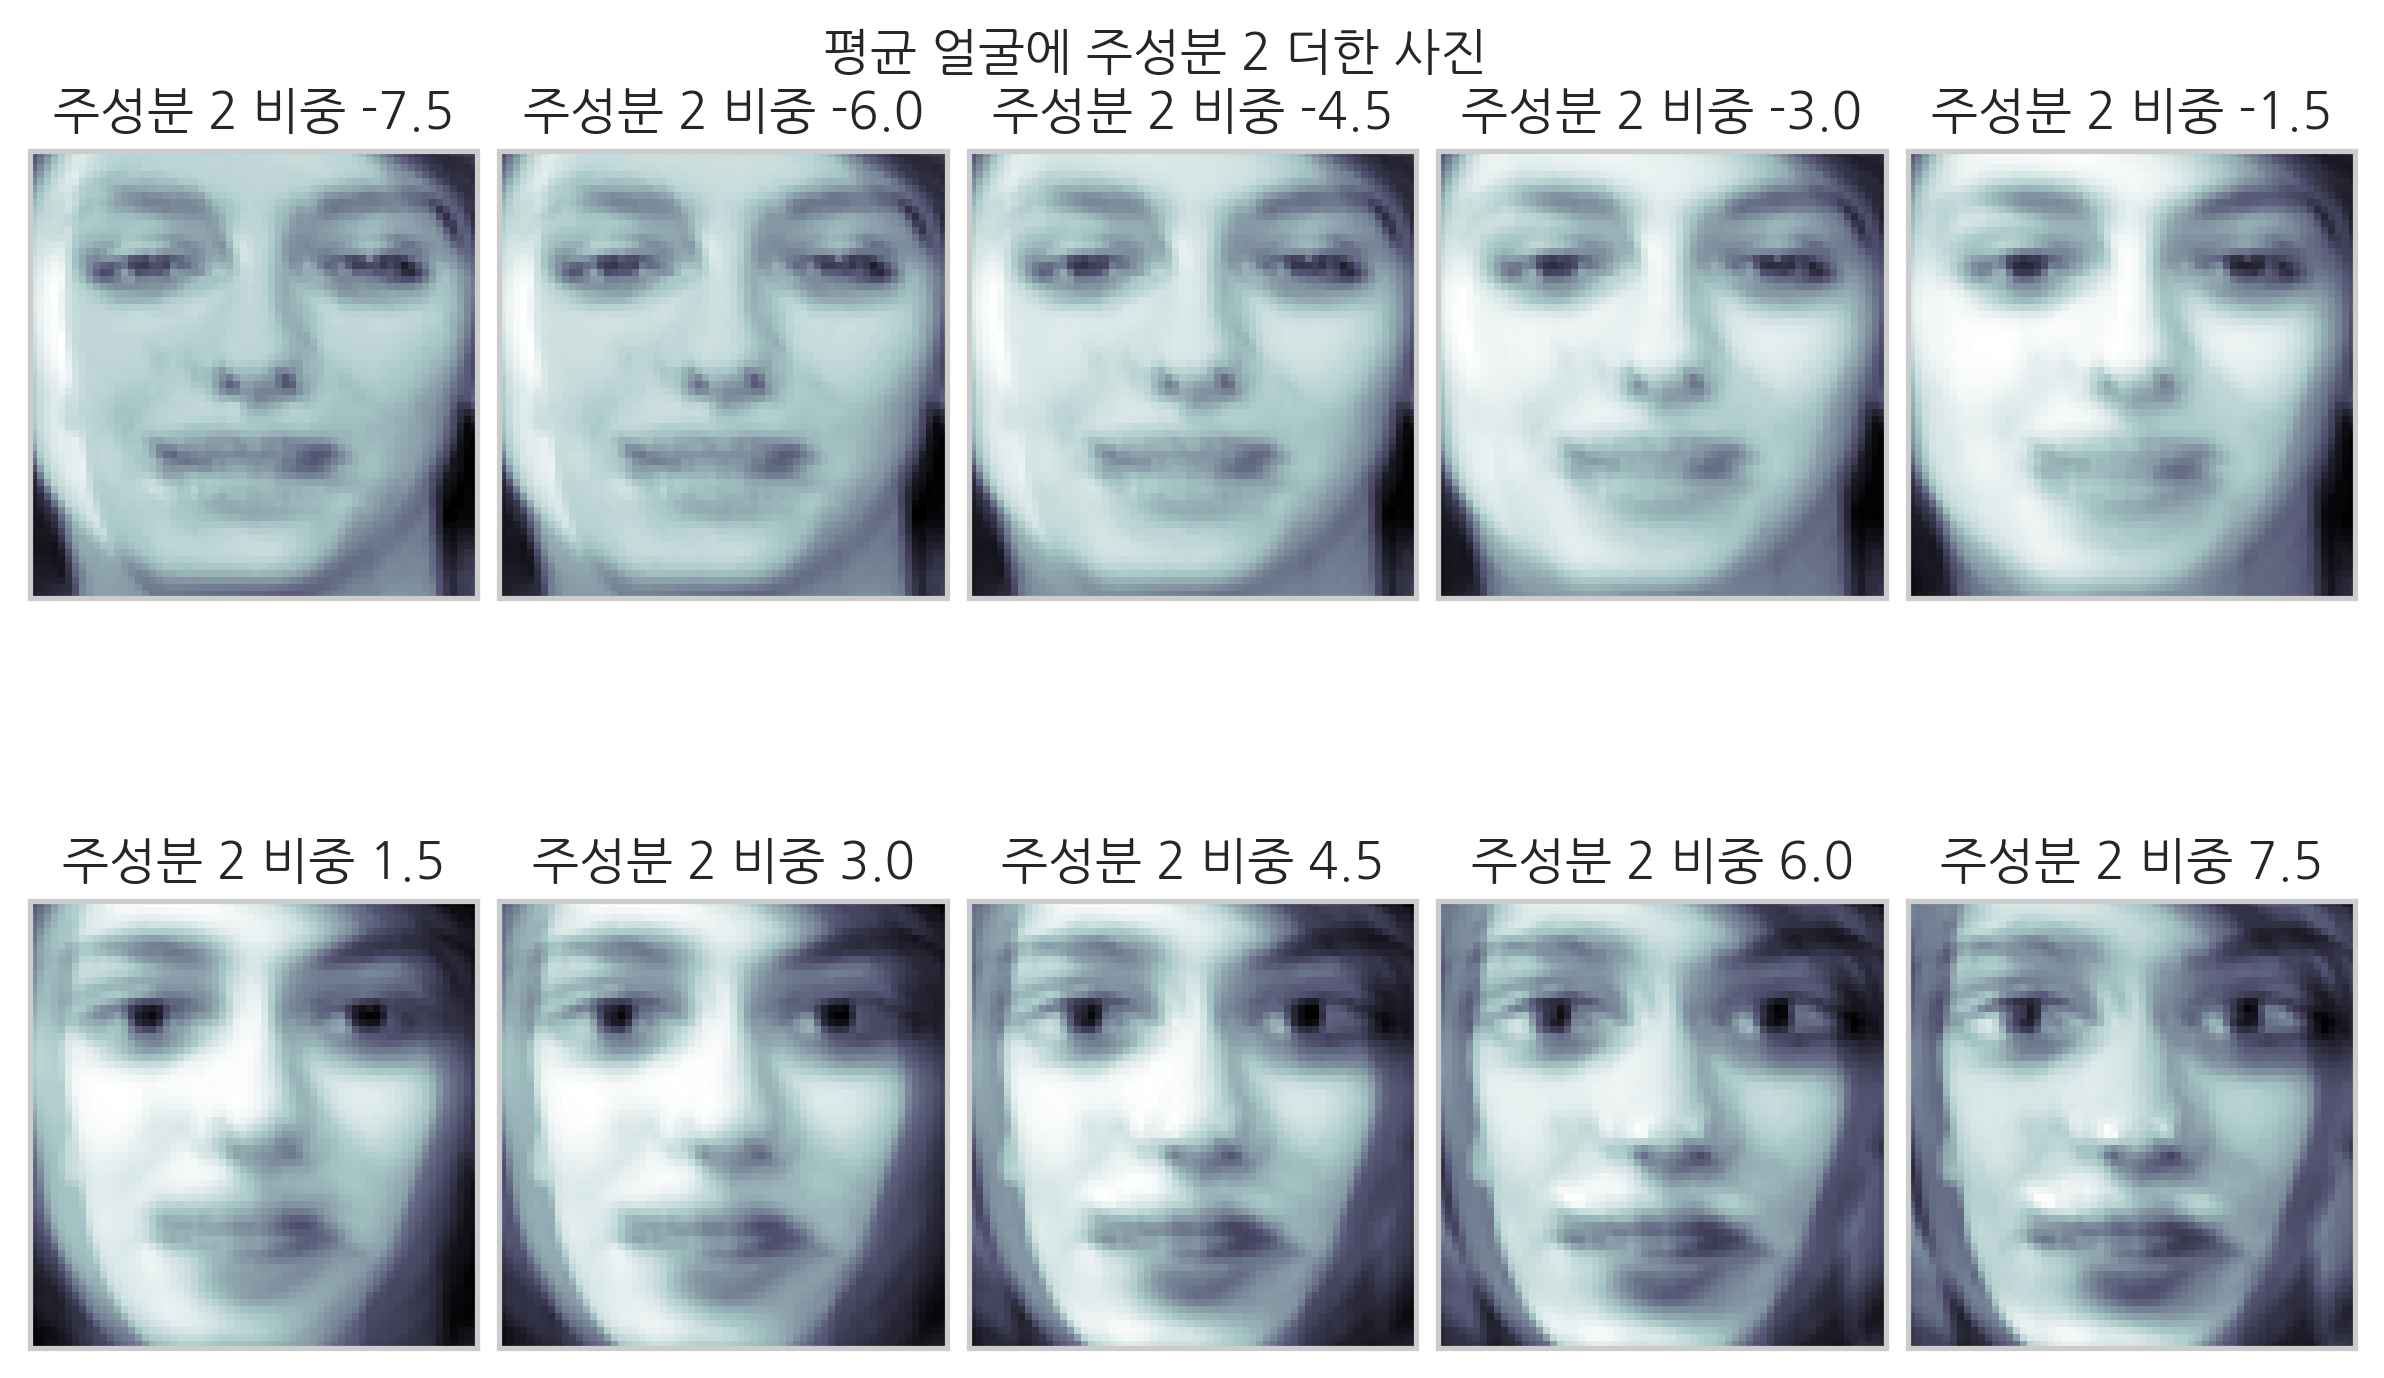

주성분 2는 사진의 시선(정면-아래)을 결정짓는 주성분이다


In [266]:
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N) : 
    for j in range(M) :
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5*(k-5) if k < 5 else 1.5*(k-4)
        ax.imshow(face_mean+w*face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('주성분 2 비중 %s' %w)
plt.suptitle('평균 얼굴에 주성분 2 더한 사진')
plt.show()

print('주성분 2는 사진의 시선(정면-아래)을 결정짓는 주성분이다')

# 테스트 2

In [368]:
from sklearn.decomposition import PCA
pca6 = PCA(n_components=1)
X_IRIS = load_iris().data[:10,:2]
X_low6 = pca6.fit_transform(X_IRIS)

print('1차원 근사 데이터')
print(X_low6)

1차원 근사 데이터
[[ 0.30270263]
 [-0.1990931 ]
 [-0.18962889]
 [-0.33097106]
 [ 0.30743473]
 [ 0.79976625]
 [-0.11185966]
 [ 0.16136046]
 [-0.61365539]
 [-0.12605597]]


In [370]:
iriss = pca6.components_
print('주성분')
print(iriss)

주성분
[[0.68305029 0.73037134]]


In [360]:
pca6.inverse_transform(X_low6)[0]

array([5.06676112, 3.53108532])

In [364]:
(pca6.mean_)+iriss*(0.30270263)

array([[5.06676112, 3.53108533]])